In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
import torch

In [2]:
test=pd.read_csv('KITAI_Dataset_1/test/_annotations.csv')
train=pd.read_csv('KITAI_Dataset_1/train/_annotations.csv')
valid=pd.read_csv('KITAI_Dataset_1/valid/_annotations.csv')

In [3]:
def crop_image (image_path, xmin, xmax, ymin, ymax):
        im=cv.imread(image_path)
        crop_img=im[ymin:ymax, xmin:xmax]
        resize= cv.resize(crop_img, (10,10),interpolation=cv.INTER_AREA).flatten()
        return resize.tolist()

In [4]:
X_test=[]
Y_test=[]
for index,row in test.iterrows():
    X_test.append(crop_image('KITAI_Dataset_1/test/'+str(row['filename']),row['xmin'],row['xmax'],row['ymin'],row['ymax']))
    if row['class']=='cyanobacteria':
        Y_test.append(0)
    else:
        Y_test.append(1)

In [5]:
X_train=[]
Y_train=[]
for index,row in train.iterrows():
    try:
        X_train.append(crop_image('KITAI_Dataset_1/train/'+str(row['filename']),row['xmin'],row['xmax'],row['ymin'],row['ymax']))
        if row['class']=='cyanobacteria':
            Y_train.append(0)
        else:
            Y_train.append(1)
    except:
        pass

In [6]:
X_valid=[]
Y_valid=[]
for index,row in valid.iterrows():
    try:
        X_valid.append(crop_image('KITAI_Dataset_1/valid/'+str(row['filename']),row['xmin'],row['xmax'],row['ymin'],row['ymax']))
        if row['class']=='cyanobacteria':
            Y_valid.append(0)
        else:
            Y_valid.append(1)
    except:
        pass

In [7]:
X_test=np.array(X_test)
Y_test=np.array(Y_test)
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_valid=np.array(X_valid)
Y_valid=np.array(Y_valid)

In [10]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
print(model)

RandomForestClassifier()


In [11]:
expected_y  = Y_test
predicted_y = model.predict(X_test)

In [12]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       143
           1       0.98      0.95      0.96       195

    accuracy                           0.96       338
   macro avg       0.96      0.96      0.96       338
weighted avg       0.96      0.96      0.96       338

[[139   4]
 [ 10 185]]


In [13]:
print("RMSE DT:",np.sqrt(mean_squared_error(Y_test, predicted_y)))
print("R2 DT:",r2_score(Y_test, predicted_y))
predictions = np.mean(cross_validate(model,X_test,Y_test,cv=100)['test_score'])
print('The accuracy is (cross validation*100): ',predictions*100,'%')

RMSE DT: 0.20351933162035313
R2 DT: 0.8303030303030303
The accuracy is (cross validation*100):  94.83333333333333 %


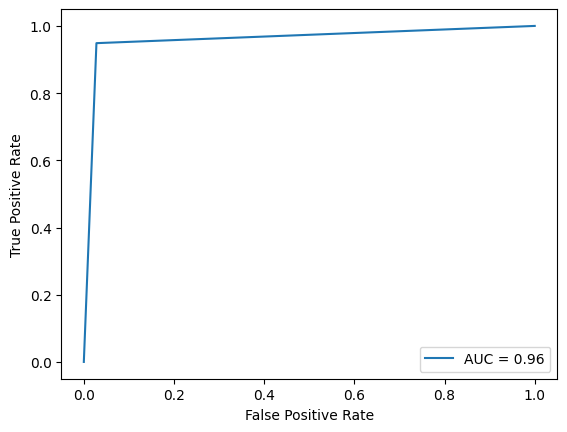

In [14]:
fpr, tpr, _ = roc_curve(Y_test, predicted_y)
roc_pls = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr))
roc_pls.plot()
plt.show()

In [15]:
y_valid=model.predict(X_valid)

In [16]:
print(metrics.classification_report(Y_valid,y_valid))
print(metrics.confusion_matrix(Y_valid, y_valid))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       242
           1       0.95      0.93      0.94       371

    accuracy                           0.93       613
   macro avg       0.93      0.93      0.93       613
weighted avg       0.93      0.93      0.93       613

[[225  17]
 [ 25 346]]


In [17]:
print("RMSE DT:",np.sqrt(mean_squared_error(Y_valid, y_valid)))
print("R2 DT:",r2_score(Y_valid, y_valid))
predictions = np.mean(cross_validate(model,X_valid,Y_valid,cv=100)['test_score'])
print('Cross Validation:', predictions)
print('The accuracy is: ',predictions*100,'%')

RMSE DT: 0.26175465144485577
R2 DT: 0.7132387338219243
Cross Validation: 0.9297619047619047
The accuracy is:  92.97619047619047 %


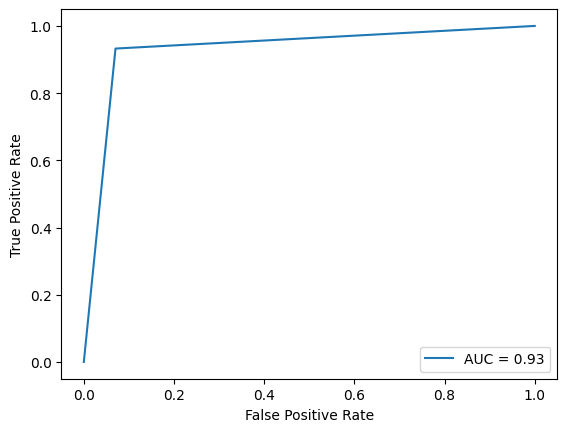

In [18]:
fpr, tpr, _ = roc_curve(Y_valid, y_valid)
roc_pls = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr))
roc_pls.plot()
plt.show()

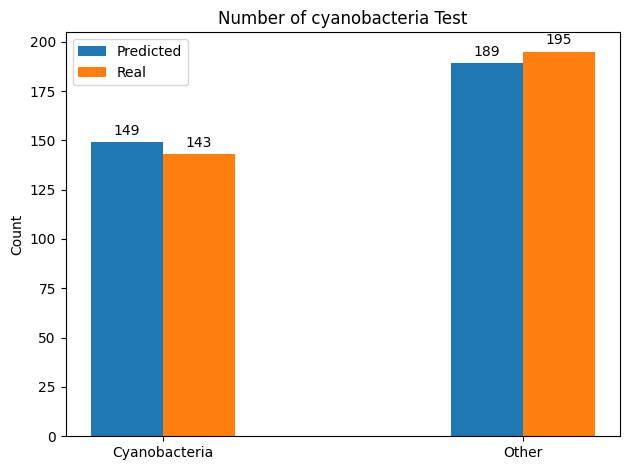

In [19]:
y_pred_list= predicted_y.tolist()
Y_test_list=Y_test.tolist()

labels = ['Cyanobacteria', 'Other']
predicted = [y_pred_list.count(0),y_pred_list.count(1)]
real=[Y_test_list.count(0),Y_test_list.count(1)]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, predicted, width, label='Predicted')
rects2 = ax.bar(x + width/2, real, width, label='Real')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Number of cyanobacteria Test')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

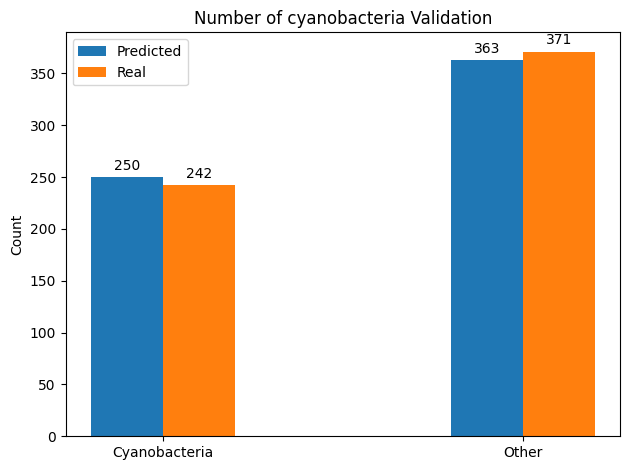

In [20]:
y_valid_list= y_valid.tolist()
Y_valid_list=Y_valid.tolist()

labels = ['Cyanobacteria', 'Other']
predicted_v = [y_valid_list.count(0),y_valid_list.count(1)]
real_v=[Y_valid_list.count(0),Y_valid_list.count(1)]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, predicted_v, width, label='Predicted')
rects2 = ax.bar(x + width/2, real_v, width, label='Real')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Number of cyanobacteria Validation')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()